Processing the last 6 columns:
['recall', 'accuracy', 'precision', 'f1', 'auc', 'eer']


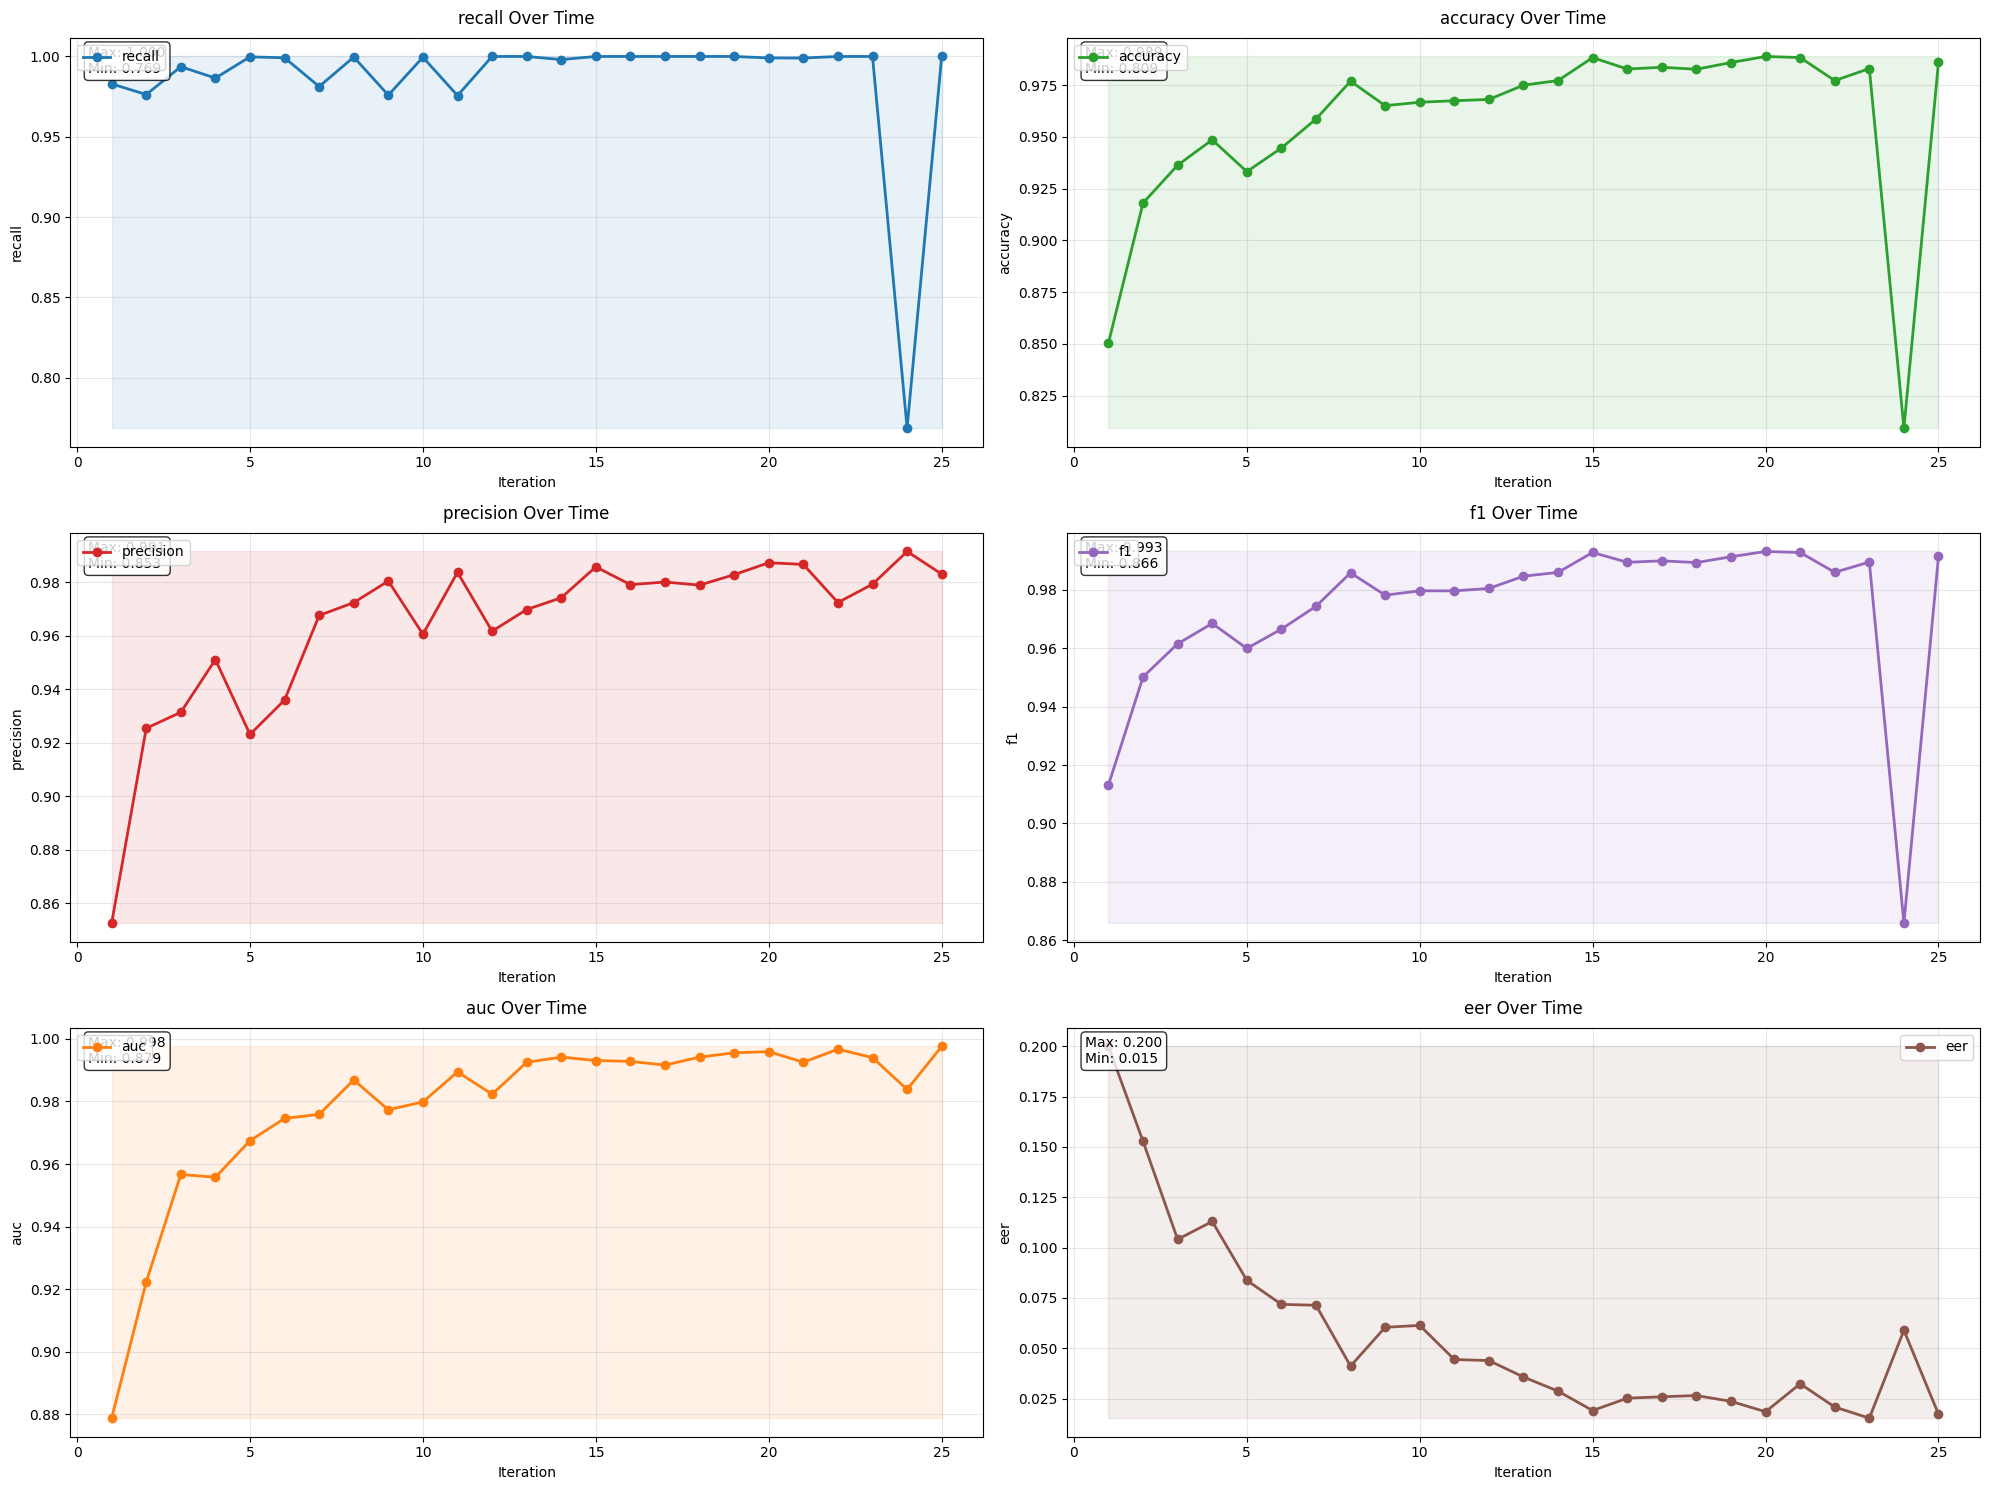

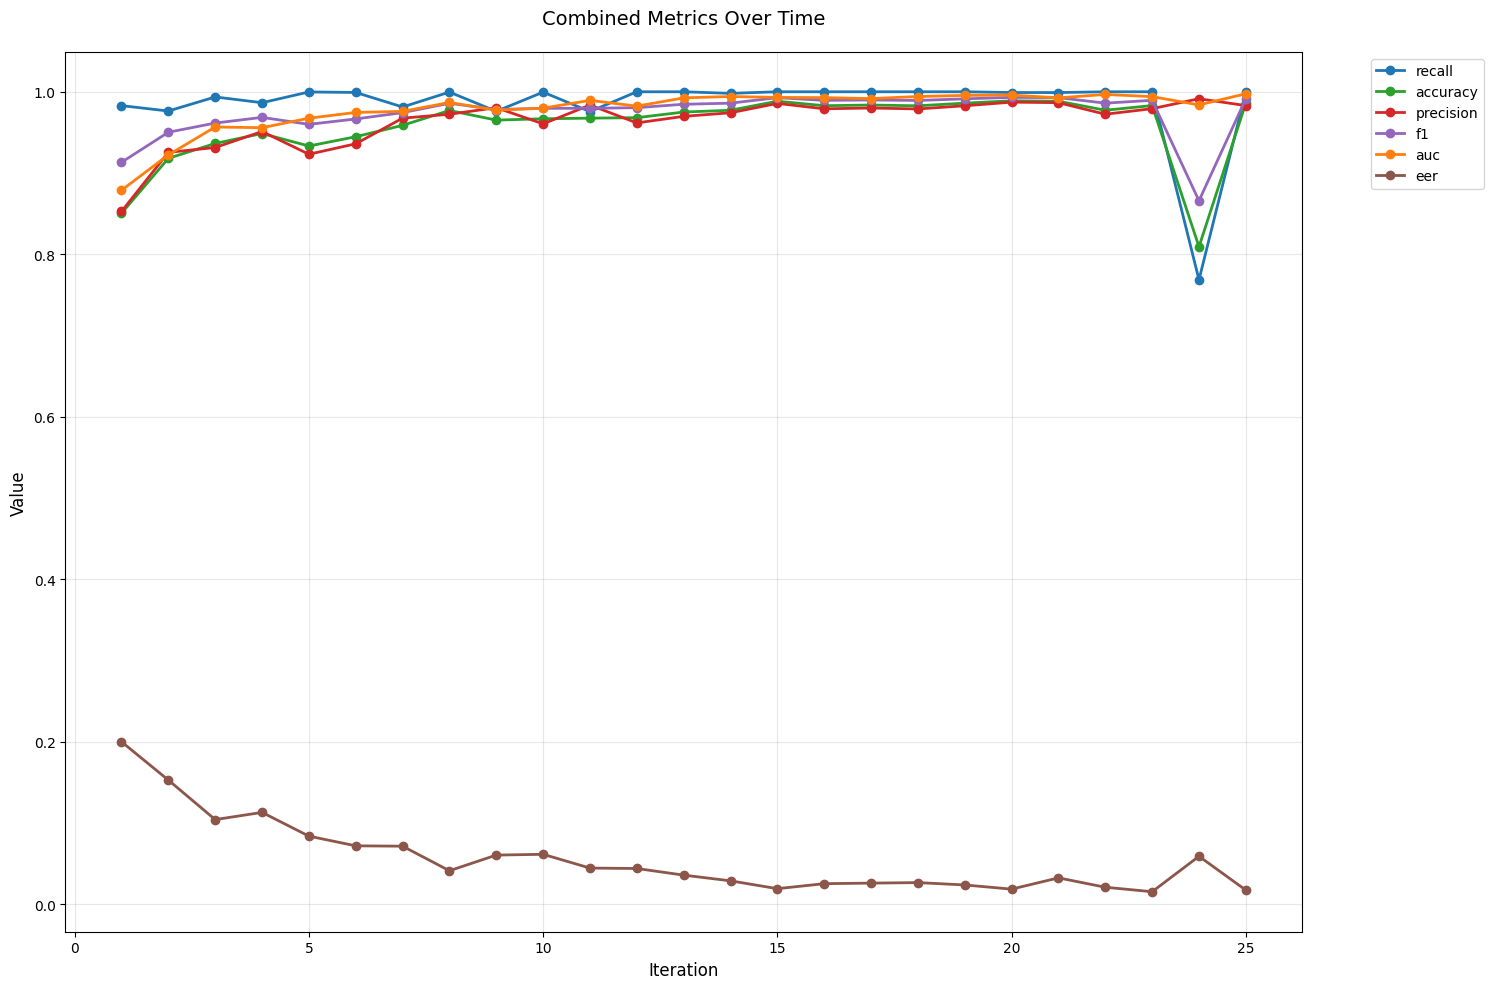


Metrics Summary:
--------------------------------------------------------------------------------
    Metric      |    Mean    |    Std     |    Min     |    Max     | Last Value
--------------------------------------------------------------------------------
    recall      |   0.985    |   0.045    |   0.769    |   1.000    |   1.000   
   accuracy     |   0.958    |   0.043    |   0.809    |   0.989    |   0.986   
   precision    |   0.964    |   0.030    |   0.853    |   0.991    |   0.983   
      f1        |   0.974    |   0.028    |   0.866    |   0.993    |   0.991   
      auc       |   0.978    |   0.026    |   0.879    |   0.998    |   0.998   
      eer       |   0.056    |   0.045    |   0.015    |   0.200    |   0.017   


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def read_and_process_csv(csv_path):
    """
    Read CSV file and process the last 6 columns (metrics)
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Get the last 6 columns
        last_6_cols = df.iloc[:, -6:]
        
        # Print information about the columns
        print("Processing the last 6 columns:")
        print(last_6_cols.columns.tolist())
        
        return last_6_cols
        
    except Exception as e:
        print(f"Error reading CSV: {str(e)}")
        return None

def plot_metrics(df):
    """
    Create plots for the 6 evaluation metrics
    """
    # Use default style
    plt.style.use('default')
    
    # Create figure with subplots (3x2 grid for individual plots)
    fig = plt.figure(figsize=(20, 15))
    
    # Color palette
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#8c564b']
    
    # Plot individual metrics
    for i, (col_name, color) in enumerate(zip(df.columns, colors), 1):
        ax = plt.subplot(3, 2, i)
        
        # Get values
        values = df[col_name].values
        iterations = range(1, len(values) + 1)
        
        # Create the plot
        plt.plot(iterations, values, color=color, marker='o', label=col_name, linewidth=2)
        plt.fill_between(iterations, min(values), max(values), 
                        color=color, alpha=0.1)
        
        plt.title(f'{col_name} Over Time', fontsize=12, pad=10)
        plt.xlabel('Iteration', fontsize=10)
        plt.ylabel(col_name, fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        
        # Add min/max values as text
        plt.text(0.02, 0.98, f'Max: {max(values):.3f}\nMin: {min(values):.3f}',
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    
    # Create combined plot
    fig_combined = plt.figure(figsize=(15, 10))
    ax = fig_combined.add_subplot(111)
    
    # Plot all metrics on the same graph
    for col_name, color in zip(df.columns, colors):
        values = df[col_name].values
        iterations = range(1, len(values) + 1)
        plt.plot(iterations, values, color=color, marker='o', label=col_name, linewidth=2)
    
    plt.title('Combined Metrics Over Time', fontsize=14, pad=20)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, fig_combined

def print_metrics_summary(df):
    """
    Print summary statistics for each metric
    """
    print("\nMetrics Summary:")
    print("-" * 80)
    print(f"{'Metric':^15} | {'Mean':^10} | {'Std':^10} | {'Min':^10} | {'Max':^10} | {'Last Value':^10}")
    print("-" * 80)
    
    for col in df.columns:
        values = df[col].values
        print(f"{col:^15} | {values.mean():^10.3f} | {values.std():^10.3f} | "
              f"{values.min():^10.3f} | {values.max():^10.3f} | {values[-1]:^10.3f}")

if __name__ == "__main__":
    # Replace with your CSV file path
    csv_path = 'C:/Users/Admin/Desktop/fsdownload/results_123/results/new_test_results_user7.csv'
    
    try:
        # Read and process the CSV
        metrics_df = read_and_process_csv(csv_path)
        
        if metrics_df is not None:
            # Create and save the plots
            fig_individual, fig_combined = plot_metrics(metrics_df)
            
            # Save the plots
            fig_individual.savefig('individual_metrics.png', dpi=300, bbox_inches='tight')
            fig_combined.savefig('combined_metrics.png', dpi=300, bbox_inches='tight')
            
            # Close the figures
            plt.close('all')
            
            # Print metrics summary
            print_metrics_summary(metrics_df)
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("\nTroubleshooting tips:")
        print("1. Make sure your CSV file exists at the specified path")
        print("2. Make sure your CSV has at least 6 columns")
        print("3. Verify that the last 6 columns contain numerical data")
        print("4. Expected metrics order: Recall, Accuracy, Precision, F1, AUC, EER")


Processing metrics with window size from column 2
Window sizes: [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250]
Metrics columns: ['recall', 'accuracy', 'precision', 'f1', 'auc', 'eer']


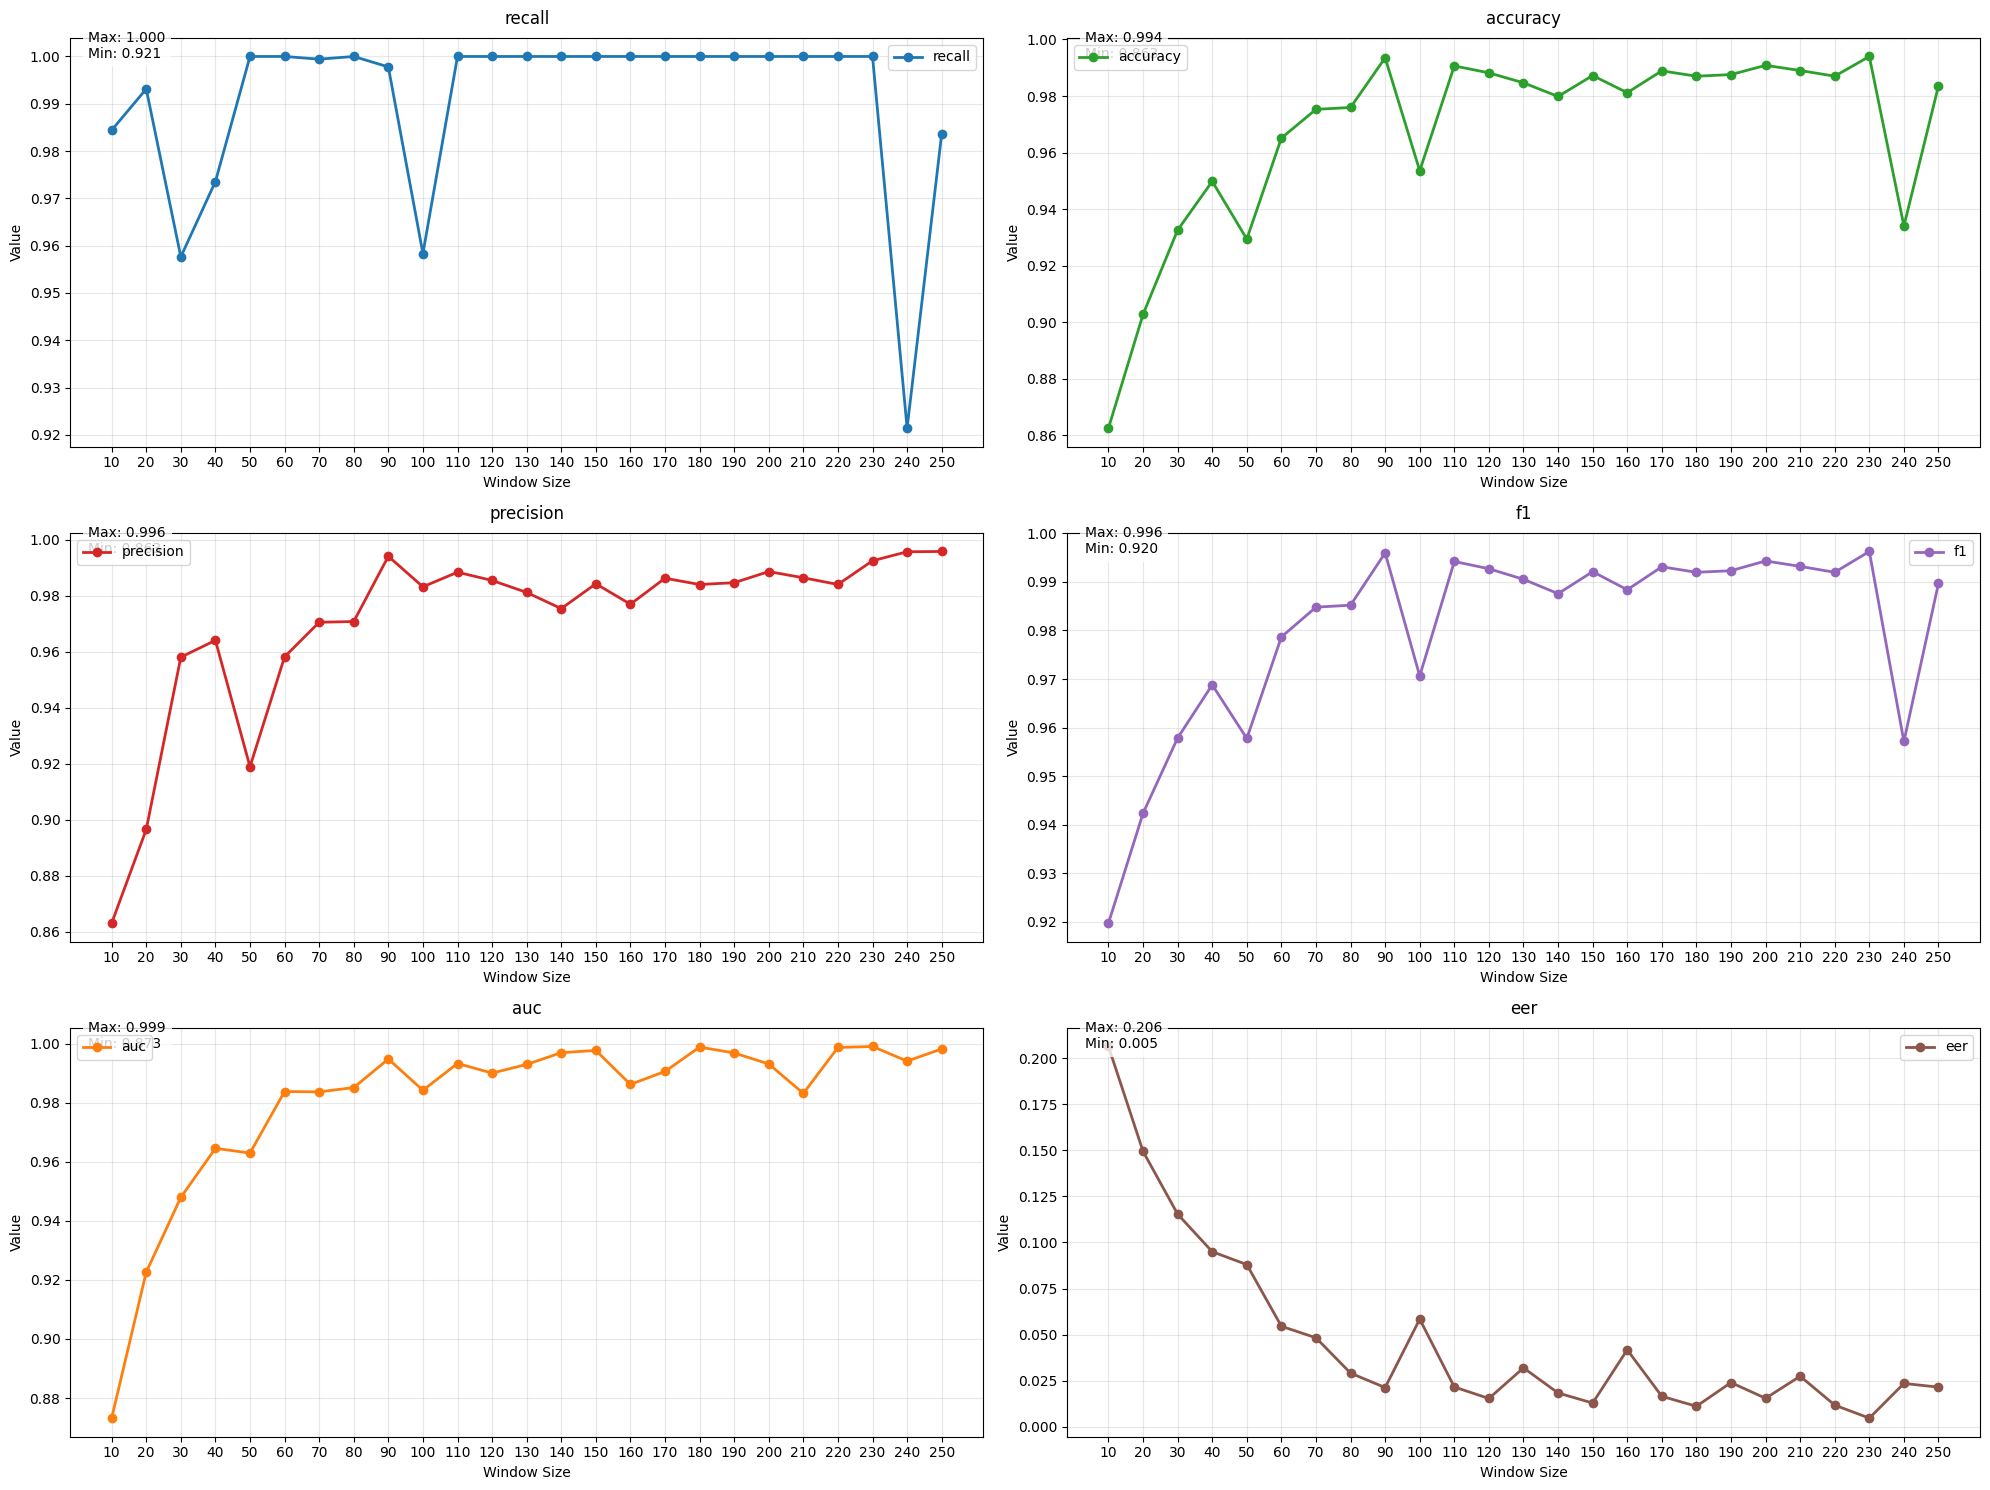

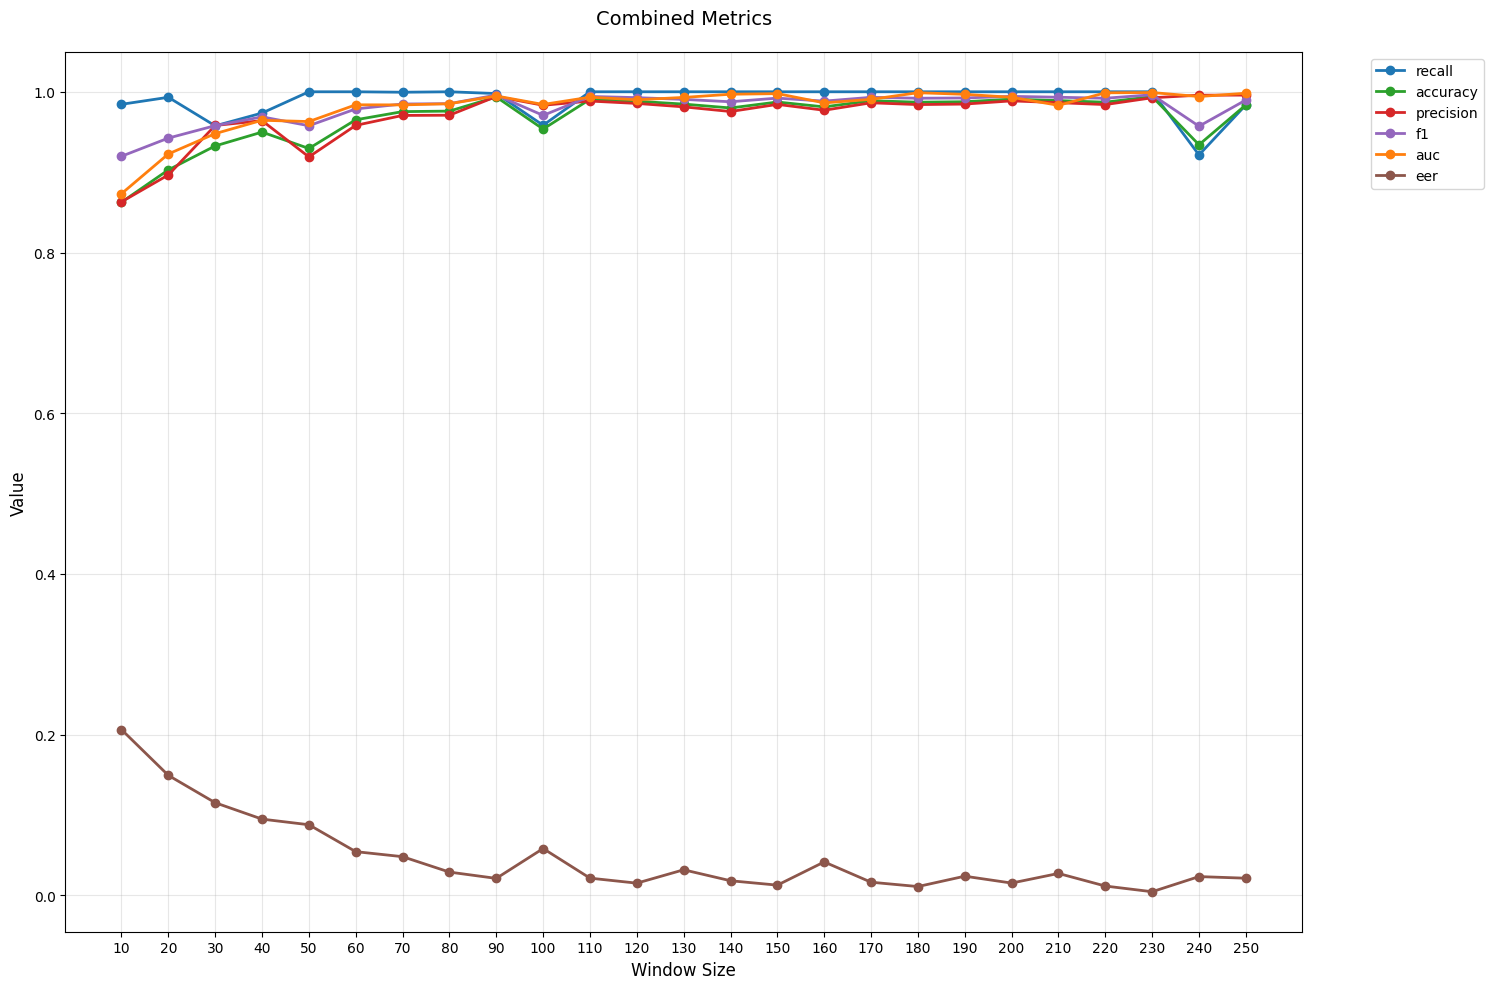


Metrics Summary:
----------------------------------------------------------------------------------------------------
    Metric      |    Mean    |    Std     |    Min     |    Max     |       Window Sizes       
----------------------------------------------------------------------------------------------------
    recall      |   0.991    |   0.019    |   0.921    |   1.000    | 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250
   accuracy     |   0.968    |   0.032    |   0.863    |   0.994    | 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250
   precision    |   0.971    |   0.032    |   0.863    |   0.996    | 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250
      f1        |   0.980    |   0.019    |   0.920    |   0.996    | 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def read_and_process_csv(csv_path):
    """
    Read CSV file and use window_size column as x-axis values
    """
    try:
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Get window_size column (2nd column) and metrics (last 6 columns)
        window_sizes = df.iloc[:, 1]  # Get the second column
        metrics_df = df.iloc[:, -6:]  # Get the last 6 columns
        
        print("\nProcessing metrics with window size from column 2")
        print("Window sizes:", window_sizes.values)
        print("Metrics columns:", metrics_df.columns.tolist())
        
        return window_sizes, metrics_df
        
    except Exception as e:
        print(f"Error reading CSV: {str(e)}")
        return None, None

def plot_metrics_with_window_size(window_sizes, df):
    """
    Create plots using window_size as x-axis
    """
    plt.style.use('default')
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    
    # Colors for different metrics
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#8c564b']
    
    # Plot individual metrics
    for i, (col_name, color) in enumerate(zip(df.columns, colors), 1):
        ax = plt.subplot(3, 2, i)
        
        values = df[col_name].values
        
        # Plot metric values using window_size as x-axis
        plt.plot(window_sizes, values, color=color, marker='o', label=col_name, linewidth=2)
        
        plt.title(f'{col_name}', fontsize=12, pad=10)
        plt.xlabel('Window Size', fontsize=10)
        plt.ylabel('Value', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # Add min/max values
        plt.text(0.02, 0.95, f'Max: {max(values):.3f}\nMin: {min(values):.3f}',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
                fontsize=10)
        
        # Set x-axis ticks to window sizes
        plt.xticks(window_sizes)
    
    plt.tight_layout()
    
    # Create combined plot
    fig_combined = plt.figure(figsize=(15, 10))
    ax = fig_combined.add_subplot(111)
    
    # Plot all metrics
    for col_name, color in zip(df.columns, colors):
        values = df[col_name].values
        plt.plot(window_sizes, values, color=color, marker='o', label=col_name, linewidth=2)
    
    plt.title('Combined Metrics', fontsize=14, pad=20)
    plt.xlabel('Window Size', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set x-axis ticks to window sizes
    plt.xticks(window_sizes)
    
    plt.tight_layout()
    plt.show()
    
    return fig, fig_combined

def print_metrics_summary(window_sizes, df):
    """
    Print summary statistics with window sizes
    """
    print("\nMetrics Summary:")
    print("-" * 100)
    header = f"{'Metric':^15} | {'Mean':^10} | {'Std':^10} | {'Min':^10} | {'Max':^10} | {'Window Sizes':^25}"
    print(header)
    print("-" * 100)
    
    for col in df.columns:
        values = df[col].values
        window_size_str = ', '.join(map(str, window_sizes))
        print(f"{col:^15} | {values.mean():^10.3f} | {values.std():^10.3f} | "
              f"{values.min():^10.3f} | {values.max():^10.3f} | {window_size_str:^25}")

if __name__ == "__main__":
    # Replace with your CSV file path
    csv_path = 'C:/Users/Admin/Desktop/fsdownload/results_123/results/new_test_results_user9.csv'
    
    try:
        # Read and process the CSV
        window_sizes, metrics_df = read_and_process_csv(csv_path)
        
        if metrics_df is not None:
            # Create and save the plots
            fig_individual, fig_combined = plot_metrics_with_window_size(window_sizes, metrics_df)
            
            # Save the plots
            fig_individual.savefig('metrics_by_window_size.png', dpi=300, bbox_inches='tight')
            fig_combined.savefig('combined_metrics_by_window_size.png', dpi=300, bbox_inches='tight')
            
            # Close the figures
            plt.close('all')
            
            # Print metrics summary
            print_metrics_summary(window_sizes, metrics_df)
            
            print("\nPlots saved as:")
            print("1. metrics_by_window_size.png - Shows individual metrics")
            print("2. combined_metrics_by_window_size.png - Shows all metrics together")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("\nTroubleshooting tips:")
        print("1. Make sure your CSV file exists at the specified path")
        print("2. Make sure your CSV has the window size in the second column")
        print("3. Make sure the last 6 columns contain the metrics:")
        print("   Recall, Accuracy, Precision, F1, AUC, EER")